# Compare: TreeCorr JK Covariances
- Load outputs from `run.py` and `run-kmeans.py`
- Plot data
- Compare covariances results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

## Load Covariances

### Healpix Method

In [2]:
healpix = dict()
fname_base = './data/xi_Nside8_jk_patches_{:05d}.npy'
vec = [np.load(fname_base.format(kk)) for kk in range(88)]
healpix['Nside8'] = np.array(vec)

fname_base = './data/xi_Nside16_jk_patches_{:05d}.npy'
vec = [np.load(fname_base.format(kk)) for kk in range(376)]
healpix['Nside16'] = np.array(vec)

In [3]:
kmeans = dict()
fname_base = './data/xi_kmeans10_jk_patches_{:05d}.npy'
vec = [np.load(fname_base.format(kk)) for kk in range(10)]
kmeans['10'] = np.array(vec)

fname_base = './data/xi_kmeans50_jk_patches_{:05d}.npy'
vec = [np.load(fname_base.format(kk)) for kk in range(50)]
kmeans['50'] = np.array(vec)

fname_base = './data/xi_kmeans100_jk_patches_{:05d}.npy'
vec = [np.load(fname_base.format(kk)) for kk in range(100)]
kmeans['100'] = np.array(vec)

fname_base = './data/xi_kmeans300_jk_patches_{:05d}.npy'
vec = [np.load(fname_base.format(kk)) for kk in range(100)]
kmeans['300'] = np.array(vec)

### Compute Covariance

In [4]:
def get_jk_cov(jk_stats,npatches):
    """
    Get JackKnife covariance and error bar. 
 
    Args:
        jk_stats (array): array with the statistics computed for each JK patch
        npatches (float): number of JK patches 
    """
    mgg  = np.mean(jk_stats, axis =0)
    cov_jk  = np.sum((jk_stats - mgg[None, :])[:, :, None] *
                 (jk_stats - mgg[None, :])[:, None, :], axis=0)
    cov_jk *= ((npatches - 1.)/npatches)  
    sig_jk  = np.sqrt(np.diag(cov_jk))
    return cov_jk, sig_jk

In [5]:
cov, sig = get_jk_cov(healpix['Nside8'], healpix['Nside8'].shape[0])
healpix['Nside8_cov'] = cov
healpix['Nside8_sig'] = sig

cov, sig = get_jk_cov(healpix['Nside16'], healpix['Nside16'].shape[0])
healpix['Nside16_cov'] = cov
healpix['Nside16_sig'] = sig

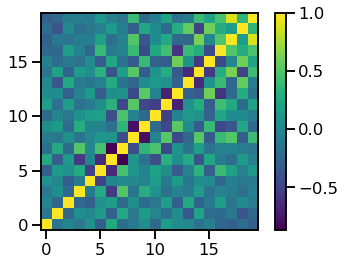

In [6]:
plt.imshow(np.corrcoef(cov),origin='lower')
plt.colorbar()

In [7]:
cov, sig = get_jk_cov(kmeans['10'], kmeans['10'].shape[0])
kmeans['10_cov'] = cov
kmeans['10_sig'] = sig

cov, sig = get_jk_cov(kmeans['50'], kmeans['50'].shape[0])
kmeans['50_cov'] = cov
kmeans['50_sig'] = sig

cov, sig = get_jk_cov(kmeans['100'], kmeans['100'].shape[0])
kmeans['100_cov'] = cov
kmeans['100_sig'] = sig

cov, sig = get_jk_cov(kmeans['300'], kmeans['300'].shape[0])
kmeans['300_cov'] = cov
kmeans['300_sig'] = sig

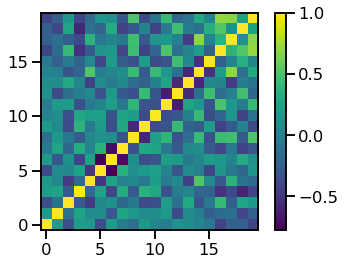

In [8]:
cov = kmeans['300_cov']
plt.imshow(np.corrcoef(cov),origin='lower')
plt.colorbar()

In [10]:
config ={
         'dec_col': 'dec',
         'dec_units': 'degrees',
         'ra_col': 'ra',
         'ra_units': 'degrees',
         'sep_units': 'arcmin',
         'max_sep': 100,
         'min_sep': 1,
         'nbins': 20,
         'verbose': 0
        }

In [11]:
r = np.logspace(np.log10(config['min_sep']),np.log10(config['max_sep']), config['nbins'])
r

array([  1.        ,   1.27427499,   1.62377674,   2.06913808,
         2.6366509 ,   3.35981829,   4.2813324 ,   5.45559478,
         6.95192796,   8.8586679 ,  11.28837892,  14.38449888,
        18.32980711,  23.35721469,  29.76351442,  37.92690191,
        48.32930239,  61.58482111,  78.47599704, 100.        ])

Text(0.5, 0, '$\\theta$ (arcmin)')

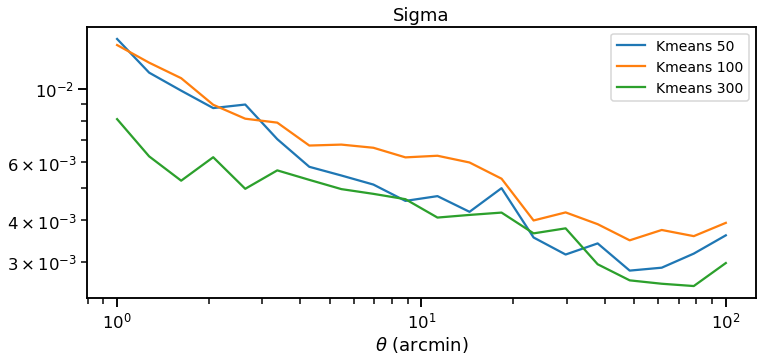

In [16]:
plt.figure(figsize=(12,5))
plt.loglog()
for ni in [50, 100, 300]:
    plt.plot(r, kmeans['%i_sig'%ni], label='Kmeans %i'%ni)

# plt.plot(r, healpix['Nside8_sig'],label='Hpx %i'%88)
# plt.plot(r, healpix['Nside16_sig'],label='Hpx %i'%316)
plt.legend(fontsize=14)
plt.title('Sigma')
plt.xlabel(r'$\theta$ (arcmin)')


In [17]:
def save_jk_covariance(fname, output):
    r, cov, sig, mean = output
    np.savez(fname, r=r, mean=mean, cov=cov, sig=sig)


In [19]:
for ni in [10, 50, 100, 300]:
    outfile = './output/all_kmeans%i'%ni
    save_jk_covariance(outfile, 
                       [r, kmeans['%i_cov'%ni], kmeans['%i_sig'%ni], np.mean(kmeans['%i'%ni],0)])

In [31]:
for ni in [8, 16]:
    outfile = './output/all_healpix_Nside%i'%ni
    save_jk_covariance(outfile, 
                       [r, healpix['Nside%i_cov'%ni], healpix['Nside%i_sig'%ni], 
                        np.mean(healpix['Nside%i'%ni],0)])

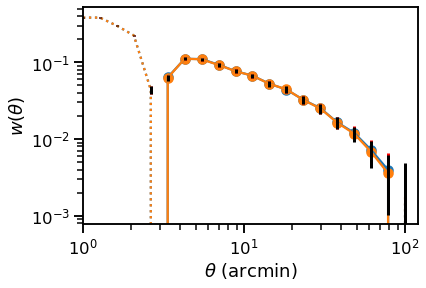

In [15]:
vec = kmeans['300']
# vec = healpix['Nside16']
xi = np.mean(vec,axis=0)

plt.scatter(r, xi, color='tab:blue')
plt.plot(r, xi, color='tab:blue')
plt.plot(r, -xi, color='tab:blue', ls=':')
plt.errorbar(r[xi>0], xi[xi>0], yerr=sig[xi>0], color='r', lw=3, ls='')
plt.errorbar(r[xi<0], -xi[xi<0], yerr=sig[xi<0], color='r', lw=3, ls='')
leg = plt.errorbar(-r, xi, yerr=sig, color='tab:orange')

# vec = kmeans['50']
vec = healpix['Nside16']
xi = np.mean(vec,axis=0)

plt.scatter(r, xi, color='tab:orange')
plt.plot(r, xi, color='tab:orange')
plt.plot(r, -xi, color='tab:orange', ls=':')
plt.errorbar(r[xi>0], xi[xi>0], yerr=sig[xi>0], color='k', lw=3, ls='')
plt.errorbar(r[xi<0], -xi[xi<0], yerr=sig[xi<0], color='k', lw=3, ls='')
leg = plt.errorbar(-r, xi, yerr=sig, color='tab:orange')

plt.xscale('log')
plt.yscale('log', nonpositive='clip')
plt.xlabel(r'$\theta$ (arcmin)')

plt.ylabel(r'$w(\theta)$')
# plt.legend([leg], [r'$w(\theta)$'], loc='lower left')
plt.xlim([1,120])
plt.show()

In [32]:
out = np.load(outfile+'.npz')

In [33]:
list(out.keys())

['r', 'mean', 'cov', 'sig']

In [34]:
out['r']

array([  1.        ,   1.27427499,   1.62377674,   2.06913808,
         2.6366509 ,   3.35981829,   4.2813324 ,   5.45559478,
         6.95192796,   8.8586679 ,  11.28837892,  14.38449888,
        18.32980711,  23.35721469,  29.76351442,  37.92690191,
        48.32930239,  61.58482111,  78.47599704, 100.        ])

In [35]:
out['mean']

array([-0.38269296, -0.38146554, -0.29961157, -0.22349591, -0.04352211,
        0.06277627,  0.11140445,  0.10920775,  0.09228241,  0.07649983,
        0.06682465,  0.05232149,  0.04438893,  0.03230554,  0.02500382,
        0.01633203,  0.01170911,  0.00679201,  0.00357134, -0.00188579])

In [36]:
out['cov'].shape

(20, 20)

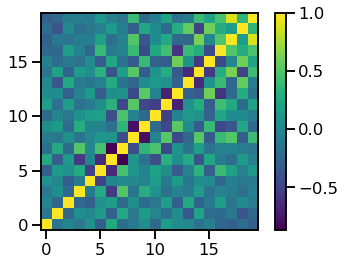

In [38]:
plt.imshow(np.corrcoef(out['cov']),origin='lower')
plt.colorbar()

<ErrorbarContainer object of 3 artists>

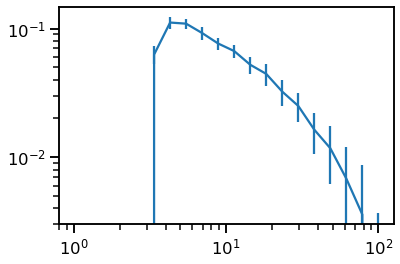

In [37]:
plt.loglog()
plt.errorbar(out['r'],out['mean'],yerr=out['sig'])